<a href="https://colab.research.google.com/github/Umamcode/Data-Mining-Umam/blob/Praktikum-3/Praktikum_3_Tugas_Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
#Importing dan Exporting Data
df = pd.read_csv('/content/drive/MyDrive/Semester3/Peminatan/Data_Mining/Dataset/top_insta_influencers_data.csv')
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [6]:
# cek missing value
df.isnull().sum()

,0
rank,0
channel_info,0
influence_score,0
posts,0
followers,0
avg_likes,0
60_day_eng_rate,0
new_post_avg_like,0
total_likes,0
country,62


In [7]:
import pandas as pd

# Fungsi untuk mengubah notasi 'k', 'm', dan 'b' ke angka
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
    return float(value)

# Daftar kolom yang perlu dikonversi karena tipe datanya tidak ssuai
columns_to_convert = ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']

# Lakukan konversi untuk setiap kolom
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numeric)

# Untuk kolom '60_day_eng_rate', hilangkan '%' dan ubah ke float
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.rstrip('%').astype(float)


In [8]:
df.drop(columns='country', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 14.2+ KB


In [10]:
# Menjadikan identifier sebagai index agar memudahkan mengambil sebuah data
df.set_index('rank', inplace=True)
df

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
rank,,,,,,,,
1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10
2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10
3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09
4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10
5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10
...,...,...,...,...,...,...,...,...
196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09
197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09
198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08


In [11]:
# Merubah nama kolom
df.rename(columns={
    'channel_info': 'Nama_Akun',
    'posts': 'Postingan',
    'followers': 'Pengikut',
    'avg_likes': 'Rata_Rata_Likes',
    'new_post_avg_like': 'Rata_Rata_Likes_Postingan_Baru',
    'total_likes': 'Total_Likes',
    '60_day_eng_rate': 'Engagement_Rate_60_Hari',
    'new_post_avg_like': 'Rata_Rata_Likes_Postingan_Baru',
    'total_likes': 'Total_Likes'
}, inplace=True)


df


,Nama_Akun,influence_score,Postingan,Pengikut,Rata_Rata_Likes,Engagement_Rate_60_Hari,Rata_Rata_Likes_Postingan_Baru,Total_Likes
rank,,,,,,,,
1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10
2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10
3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09
4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10
5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10
...,...,...,...,...,...,...,...,...
196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09
197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09
198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08


In [12]:
df.describe()

,influence_score,Postingan,Pengikut,Rata_Rata_Likes,Engagement_Rate_60_Hari,Rata_Rata_Likes_Postingan_Baru,Total_Likes
count,200.000000,200.000000,2.000000e+02,2.000000e+02,199.000000,2.000000e+02,2.000000e+02
mean,81.820000,3499.850000,7.740950e+07,1.787104e+06,1.902010,1.208132e+06,3.658112e+09
std,8.878159,3475.828158,7.368727e+07,2.193359e+06,3.329719,1.858322e+06,5.561939e+09
min,22.000000,10.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07
25%,80.000000,947.500000,4.000000e+07,5.044000e+05,0.410000,1.957500e+05,9.968500e+08
50%,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.880000,5.321500e+05,2.000000e+09
75%,86.000000,5025.000000,6.890000e+07,2.100000e+06,2.035000,1.325000e+06,3.900000e+09
max,93.000000,17500.000000,4.758000e+08,1.540000e+07,26.410000,1.260000e+07,5.740000e+10


<ipython-input-13-a46a8602093f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pengikut', y='Nama_Akun', data=top_10_followers, palette='viridis')


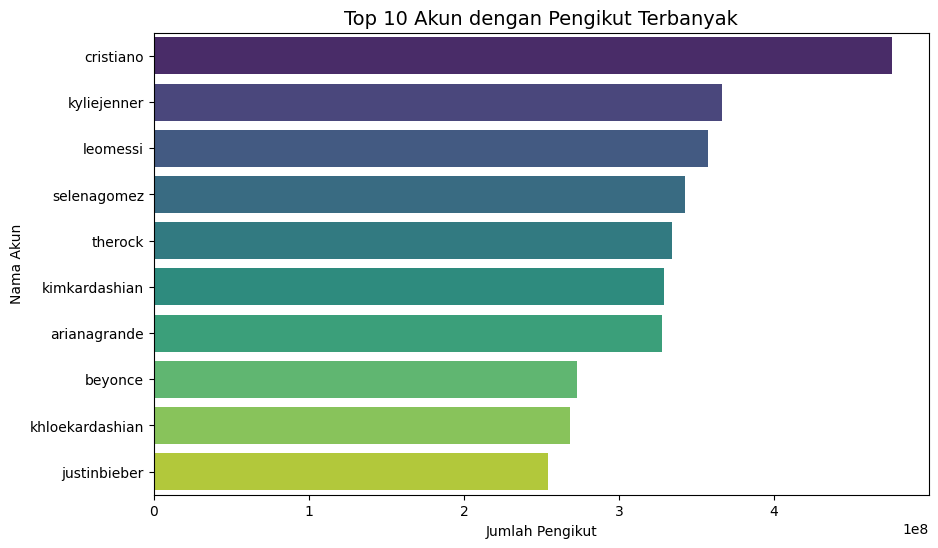

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil data 10 akun dengan pengikut terbanyak
top_10_followers = df.nlargest(10, 'Pengikut')

# visualisasi plot menggunakan barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Pengikut', y='Nama_Akun', data=top_10_followers, palette='viridis')
plt.title('Top 10 Akun dengan Pengikut Terbanyak', fontsize=14)
plt.xlabel('Jumlah Pengikut')
plt.ylabel('Nama Akun')
plt.show()


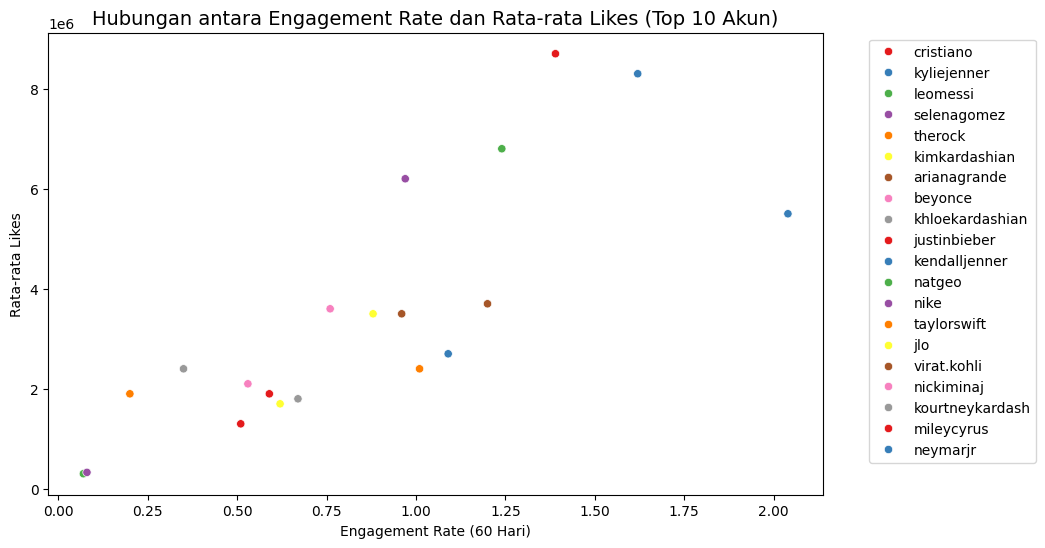

In [14]:
# Ambil data 20 akun dengan pengikut terbanyak
pengikut_20_atas = df.nlargest(20, 'Pengikut')

# Visualisasi data korelasi Engagement_Rate_60_Hari dan Rata_Rata_Likes menggunakan data pada kolom pengikut
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engagement_Rate_60_Hari', y='Rata_Rata_Likes', hue='Nama_Akun', data=pengikut_20_atas, palette='Set1')
plt.title('Hubungan antara Engagement Rate dan Rata-rata Likes (Top 10 Akun)', fontsize=14)
plt.xlabel('Engagement Rate (60 Hari)')
plt.ylabel('Rata-rata Likes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)  # Memindahkan legenda di luar plot
plt.show()


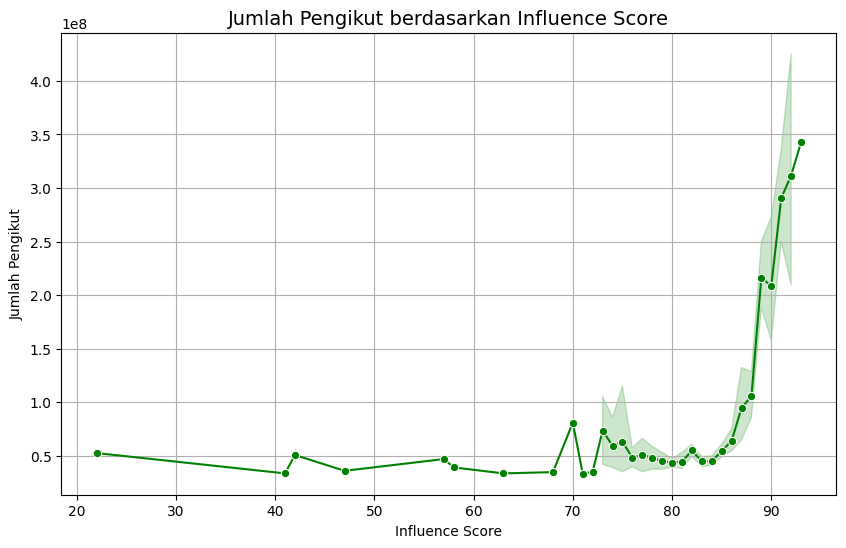

In [15]:
# Urutkan berdasarkan Influence Score
df_sorted = df.sort_values(by='influence_score', ascending=False)

# Plot Line Plot untuk visualisasi antara Influence Score dan Pengikut
plt.figure(figsize=(10, 6))
sns.lineplot(x='influence_score', y='Pengikut', data=df_sorted, marker='o', color='green')
plt.title('Jumlah Pengikut berdasarkan Influence Score', fontsize=14)
plt.xlabel('Influence Score')
plt.ylabel('Jumlah Pengikut')
plt.grid(True)
plt.show()


**Penerapan 3 Normalization**

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Pilih kolom yang mau dinormalisasi
columns_to_normalize = ['Pengikut', 'Rata_Rata_Likes', 'Engagement_Rate_60_Hari', 'Total_Likes']

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menerapkan Min-Max Normalization pada kolom dataset yang udah dipilih
df_minmax = df.copy()  # Salin dataset untuk menampung hasil normalisasi
df_minmax[columns_to_normalize] = scaler.fit_transform(df_minmax[columns_to_normalize])

# Lihat hasilnya
print(df_minmax.head()) # Menampilkan hasil dari 5 teratas aja


        Nama_Akun  influence_score  Postingan  Pengikut  Rata_Rata_Likes  \
rank                                                                       
1       cristiano               92     3300.0  1.000000         0.563088   
2     kyliejenner               91     6900.0  0.752596         0.537004   
3        leomessi               90      890.0  0.732506         0.439188   
4     selenagomez               93     1800.0  0.699549         0.400061   
5         therock               91     6800.0  0.680135         0.119655   

      Engagement_Rate_60_Hari  Rata_Rata_Likes_Postingan_Baru  Total_Likes  
rank                                                                        
1                    0.052273                       6500000.0     0.505069  
2                    0.060985                       5900000.0     1.000000  
3                    0.046591                       4400000.0     0.104244  
4                    0.036364                       3300000.0     0.200093  
5    

In [20]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom yang ingin dinormalisasi
columns_to_normalize = ['Pengikut', 'Rata_Rata_Likes', 'Engagement_Rate_60_Hari', 'Total_Likes']

# Inisialisasi ZSScaler
scaler = StandardScaler()

# Menerapkan ZS Transformation pada kolom dataset yang sudah dipilih
df_zscore = df.copy()  # Salin dataset untuk menampung hasil normalisasi
df_zscore[columns_to_normalize] = scaler.fit_transform(df_zscore[columns_to_normalize])

# Lihat hasilnya
print(df_zscore.head()) # Menampilkan hasil dari 5 teratas saja


        Nama_Akun  influence_score  Postingan  Pengikut  Rata_Rata_Likes  \
rank                                                                       
1       cristiano               92     3300.0  5.420071         3.159648   
2     kyliejenner               91     6900.0  3.928972         2.976822   
3        leomessi               90      890.0  3.807888         2.291223   
4     selenagomez               93     1800.0  3.609256         2.016984   
5         therock               91     6800.0  3.492254         0.051601   

      Engagement_Rate_60_Hari  Rata_Rata_Likes_Postingan_Baru  Total_Likes  
rank                                                                        
1                   -0.154158                       6500000.0     4.567738  
2                   -0.084908                       5900000.0     9.686685  
3                   -0.199320                       4400000.0     0.422113  
4                   -0.280612                       3300000.0     1.413458  
5    

In [22]:
import numpy as np
import pandas as pd

# Menyalin dataset kita ke variabel baru (biar data asli ga berubah)
df_decimal_scaled = df.copy()

# Kolom yang mau dinormalisasi menggunakan Decimal Scaling
columns_to_scale = ['Pengikut', 'Rata_Rata_Likes', 'Engagement_Rate_60_Hari', 'Total_Likes']

# Fungsi untuk menerapkan Decimal Scaling pada kolom yanh udah dipilih
def decimal_scaling(column):
    # Cari nilai maksimum absolut dalam kolom untuk menentukan faktor penggeseran
    # pakai abs() memastikan bahwa kita mendapatkan nilai absolut, sehingga tidak terpengaruh oleh nilai negatif.
    max_val = column.abs().max()

    # Tentukan faktor penggeseran berbasis 10.
    # disini kita menggunakan np.ceil(np.log10(max_val)) untuk menghitung jumlah digit dari nilai terbesar di kolom.
    # Faktor ini akan menjadi 10 pangkat jumlah digit maksimum.
    scaling_factor = 10 ** np.ceil(np.log10(max_val))  # Misalnya nih, jika max_val = 25000, faktor penggeseran akan jadi 100000 (10^5).

    # Bagikan setiap nilai dalam kolom dengan faktor penggeseran yang udah dihitung
    return column / scaling_factor

# Loop melalui setiap kolom yang ingin dinormalisasi dan terapkan Decimal Scaling
for col in columns_to_scale:
    # Terapkan fungsi decimal_scaling ke kolom yang udah dipilih
    df_decimal_scaled[col] = decimal_scaling(df_decimal_scaled[col])

# menampilkan hasil dataset yang sudah dinormalisasi
print("Data setelah Decimal Scaling:")
print(df_decimal_scaled.head())


Data setelah Decimal Scaling:
        Nama_Akun  influence_score  Postingan  Pengikut  Rata_Rata_Likes  \
rank                                                                       
1       cristiano               92     3300.0    0.4758            0.087   
2     kyliejenner               91     6900.0    0.3662            0.083   
3        leomessi               90      890.0    0.3573            0.068   
4     selenagomez               93     1800.0    0.3427            0.062   
5         therock               91     6800.0    0.3341            0.019   

      Engagement_Rate_60_Hari  Rata_Rata_Likes_Postingan_Baru  Total_Likes  
rank                                                                        
1                      0.0139                       6500000.0        0.290  
2                      0.0162                       5900000.0        0.574  
3                      0.0124                       4400000.0        0.060  
4                      0.0097                       